# Jupyter/Ipython notebookok a  digitális méréstechnika laboratoriumban
Ebben a notebookban röviden áttekintjünk a Jupyter/IPython rendszer által kínált néhány ezközt ([Markdown](https://help.github.com/articles/markdown-basics/), [Matplotlib](http://matplotlib.org/), [sympy](http://www.sympy.org/en/index.html), [scipy](http://scipy.org/)), amelyek segítségével a labor mérések során felmerülő rutinszerű feladatok (adatrögzítés, illesztés, egyszerű szimbolikus számítások) a notebook környezetben végrehajthatóak. 


## Markdown cellák
A nootbookokban alapvetően két fajta cella használata szükséges a jegyzőkönyvek elkészítéséhez. Markdown cellákba, amilyen a jelen cella is, írjuk a mérés soráán tapasztalt szöveges észrevételeket. A Markdown cellákban szöveges részeken kívül használhatunk Latex képleteket például így $\sin^2(\alpha)+\cos^2(\alpha)=1$, azaz a \$ segítségével . Ha egy összefüggést ki szeretnénk emelni akkor azt két \$\$ közzé kell tenni: $$E=mc^2!$$
Ha a mérés során manuális adatgyűjtés történik akkor a mért adatokat táblázatba foglalva kell a jegyzőkönyvbe illeszteni! Ezt az alábbi módon tehetjük meg:

Cím 1 | Cím 2 | Cím 3
- | - | -
1 | 12 | 41
2 | 23 | 137

A Markdown cellákban a szöveg egyes részének kiemelése **vastag** vagy *dölt* betűvel lehetséges. Ezt egy illetve kettő \* vagy \_ jellel tehetjük meg. **Így lehet például _dölt_ és vastagon szedet szöveget írni**

## Kód cellák

A kód cellákba alapvetően [python 3](http://django.arek.uni-obuda.hu/python3-doc/html/tutorial/index.html) nyelven írt kifejezések segítségével adhatunk utasításokat, adatok rögzítésére és feldolgozására. [Itt](https://perso.limsi.fr/pointal/_media/python:cours:mementopython3-english.pdf) található egy rövid összefoglaló táblázat a python 3 szintaxisáról. Egy [(I)python](http://nbviewer.ipython.org/gist/rpmuller/5920182) gyorstalpaló angol nyelven, Sok példával.Ez pedig egy ingyn használható web-es felület [Jupyter](https://tmpnb.org) notebook-ok kipróbálására. Ha egy függvény szintaxisával kapcsolatban kérdés merül fel érdemes először a kérdéses függvény [Dokumentációs Karakterláncát](http://django.arek.uni-obuda.hu/python3-doc/html/tutorial/controlflow.html#tut-docstrings) megvizsgálni a ? segítségével.

A laborgyakorlatok alatt leginkább a [Matplotlib](http://matplotlib.org/) és a [Numpy](http://www.numpy.org/) könyvtár csomagok segítségítségére fogunk támaszkodni. Ezek a csomagok ábrakészítő és lineáris algebra rutinokat tartalmaznak. 
Az alábbi kód cellabeli a Matplotlib és Numpy csomagok betöltésén kívül felkészíti a notebook környezetet a keletkező ábrák böngészőbeli megjelenítésére is (ezért felel az inline opció). Célszerű minden jegyzőkönyvet ezzel kezdeni!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Egy példa mérés adatgyűjtéssel, illesztéssel és ábra készítéssel

Induljunk ki egy mérési adatsorból:

eltelt idő [s]|megtett út [m]|mérési hiba [m]
----------:|--------------:|-------------------:
       -3.14159265| -0.18917675|  0.2
       -2.81089869|  0.30733932|  0.1
       -2.48020473|  1.10617134|  0.1
       -2.14951076|  0.99301702|  0.2
       -1.8188168 |  0.26214699|  0.3
       -1.48812284| -0.21526465|  0.1
       -1.15742887| -0.99894001|  0.4
       -0.82673491| -1.34350261|  0.2
       -0.49604095| -1.38845013|  0.4
       -0.16534698| -0.00443704|  0.1
        0.16534698|  0.06863757|  0.1
        0.49604095|  0.33781392|  0.4
        0.82673491|  0.75168117|  0.4
        1.15742887|  1.15622707|  0.5
        1.48812284| -0.13737408|  0.1
        1.8188168 | -0.34339706|  0.2
        2.14951076| -1.14117694|  0.1
        2.48020473| -1.0584432 |  0.2
        2.81089869| -0.63149239|  0.2
        3.14159265|  0.43437089|  0.2

Töltsük be ezeket az adatokat 3 python tömbbe:

In [2]:
#eltelt ido
t=[-3.14159265, -2.81089869, -2.48020473, -2.14951076, -1.8188168 ,
       -1.48812284, -1.15742887, -0.82673491, -0.49604095, -0.16534698,
        0.16534698,  0.49604095,  0.82673491,  1.15742887,  1.48812284,
        1.8188168 ,  2.14951076,  2.48020473,  2.81089869,  3.14159265];
#megtett ut
s=[-0.18917675,  0.30733932,  1.10617134,  0.99301702,  0.26214699,
       -0.21526465, -0.99894001, -1.34350261, -1.38845013, -0.00443704,
        0.06863757,  0.33781392,  0.75168117,  1.15622707, -0.13737408,
       -0.34339706, -1.14117694, -1.0584432 , -0.63149239,  0.43437089];
#meresi hiba
err=[0.2, 0.1, 0.1, 0.2, 0.3, 0.1, 0.4, 0.2, 0.4, 0.1, 0.1, 
     0.4, 0.4, 0.5, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2]

A `plot` parancs segítségével egy gyors pillantást vethetünk a mért adatsorra.

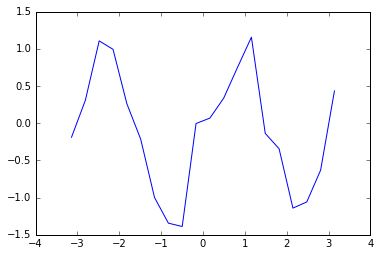

In [3]:
plot(t,s);

további részletek a `plot` függvénnyel kapcsolatban ha megvizsgáljuk a függvény függvény [dokumentációs karakterláncát](http://django.arek.uni-obuda.hu/python3-doc/html/tutorial/controlflow.html#tut-docstrings) (vagy röviden docstringjét):

In [4]:
?plot

A labor mérések során sokszor előforduló feladat a függvényillesztés. Erre a problémára a `scipy` csomag `curve_fit` függvénye nyújt kézenfekvő megoldást. Ezt a függvényt az alábbi kód cella segítségével töltjük be:

In [5]:
from scipy.optimize import curve_fit

A függvény illesztéshez használt függvényt python szintaxis szerint definiáljuk az alábbiak szerint (fizikai jelenségeken alapuló intuició vagy a mérés leírás által javasolt függvény alak alapján):

In [6]:
def func(t,a,b,c):            # Ez a sor tartalmazza a fügvény nevét és a bemenő paramétereket
    return (a*sin(b*t)+c)     # Ez a sor tartalmazza a visszatérési értékeket. 

A fent definiált függvény négy bemenő paraméterrel rendelkezik, ebből az első az ilesztés során felhasznált változó, a maradék három pedig az illesztendő paraméterek. 

**FIGYELEM: python-ban a függvények, ciklusok és egyéb egybe tartozó struktúrák szeparálásához indentálást, azaz a megfelelő sorok behúzását használjuk! ** 

Az alábbi kódcellában a fent definiált `func` függvényt fogjuk illeszteni a mért adatokra. A ` curve_fit` parancs segítségével megtörténik az illesztés. A kimenő `popt` változó tartalmazza a három illesztési paramétert a `pcov` változó pedig az illesztési paraméterek kovariancia mátrixa melynek diagonális elemei meghatározzák az illesztés hibáját. 

In [7]:
popt, pcov = curve_fit(func, t, s) #Ez a sor teszi meg az illesztést
perr = sqrt(diag(pcov))            #A kovariancia mátrix diagonális elemeinek gyöke az illesztés hibája
print(popt)                        #Az illesztési paraméterek megtekintése
print(perr)                        #A hibák megtekintése
#a popt változó egy akkora tömb ahány illesztési paraméter van, jelen esetben popt=[a,b,c] azaz három elemű tömb
#a pcov a popt-ben szereplő 

[ 1.07382785  2.04444967 -0.10171248]
[ 0.09298906  0.03988984  0.06342248]


A `curve_fit` függvény segítségével mérési hibákat is figyelembe tudjuk venni, illetve az illesztési paraméterek becslésére is van lehetőség.  A `p0` opcionális bemenő paraméterrel az illesztéshez használt paraméterek becsült kezdőértékeit állíthatjuk be a `sigma` opcionális paraméter pedig az esetleges mérési hibákat tartalmazza melyeket súlyozott illesztésre használhatunk. Az alábbi kód cellában illesztést hajtunk végre ahol figyelembe vesszük a mérési hibákat és az illesztendő paraméterek kezdőértékét a hiba nélküli illesztett paraméternek vesszük:

In [8]:
poptwe, pcovwe = curve_fit(func, t, s,p0=popt,sigma=err)
perrwe = sqrt(diag(pcovwe))
print(poptwe)
print(perrwe)

[ 1.05782091  2.06604138 -0.0639237 ]
[ 0.08819266  0.03528329  0.05365838]


Illesztési paraméterek mérési hiba szerint súlyozva:

Változó neve | értéke  | illesztési hiba 
------------ | -------------
a | 1.06  m| $\pm$ 0.09 m
b | 2.07 Hz | $\pm$ 0.035Hz
c | -0.06 m  | $\pm$ 0.05 m

A jegyzőkönyvek elkészítésének fontos mozzanata igényes, feliratozott, áttekinthető ábrák készítése! A notebook környezetben ez legkézenfekvőbben a [Matplotlib](http://matplotlib.org/) csomaggal történik. Az alábbi kód cellában egy példát látunk egy igényesen elkészített ábrára sok comment-el ellátva.

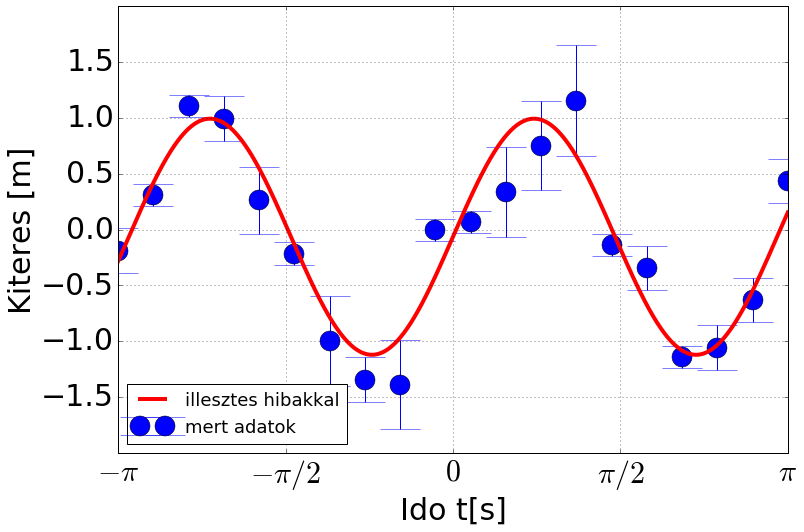

In [9]:
figsize(12,8) #Az ábra méretének beállítása

#Az alábbi parancs a plot parancshoz hasonló ám a mérési hibákat is ábrázolhatjuk vele
errorbar(t,                                             # mérési pontok tömbje
         s,                                             # mért értékek tömbje
         err,                                           # hibák tömbje
         label='mert adatok',                           # a feliratozásnál használt string
         ms=20,marker='o',color='b',capsize=20,ls='')   # az ábrázolás egyéb paraméterei

#Analitikus vagy numerikusan exakt függvények ábrázolásakor először is le kell generálnunk kiértékelési pontokat
tt=linspace(-pi,pi,3000); # kiértékelési pontok sűrű mintavételezéssel
# az illesztett függvény megjelenítése
plot(tt,                                                # az illesztett függvény kiértékelésének helyei
     func(tt,*poptwe),                                  # az illesztett függvény kiértékelése 
     'r-',                                              # piros vonallal ábrázoljuk a függvényt
     label='illesztes hibakkal',                        # a feliratozáshoz használt string
     lw=4)                                              # az ábrázolás egyéb paraméterei



#Több plot/errorbar parancs is követheti egymást! 

#Az alábbi parancsok az ábra további paramétereit tartalmazzák

#tengely cím feliratok
xlabel('Ido t[s]',fontsize=30) 
ylabel('Kiteres [m]',fontsize=30)

#tengely beosztás feliratok, figyeljük meg a különbségeket !!
xticks([-pi,-pi/2,0,pi/2,pi],[r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'],fontsize=30)
yticks([-1.5,-1,-0.5,0,0.5,1,1.5],fontsize=30)

#tengely határok
xlim(-pi,pi)
ylim(-2,2)

grid(True) #a raszter rács a könnyebb tájékozódást segíti
legend(loc='lower left',fontsize=18); 


A fenti példán túl az alábbi [link](http://matplotlib.org/gallery.html) rengeteg példával szolgál a matplotlib csomag használatára.

# Sympy szimbolikus algebrai python csomag

A [sympy](http://www.sympy.org/en/index.html) csomag a labormérések során esetlegesen előforduló bonyulultabb egyenletrendszerek megoldásában nyújthat segítséget (emellett még sok mást is tud...). Az alábbiakban egy egyszerű példával illusztráljuk ezt. 

In [10]:
import sympy # A sympy csomag betöltése
sympy.init_printing() # Latex képletek megjelenítése

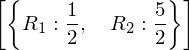

In [11]:
R1, R2, = sympy.symbols('R_1 R_2') # Változók és a megjelenítés során használt alak definiálása
# két ismeretlenes egyenletrendszer megoldása
sympy.solve([R1 - R2 + 2, R1 + R2 - 3], [R1, R2], dict=True)# Az egyenleteket 0-ra rendezve adjuk meg !


# Állományok beolvasása
A laborban megtalálható mérések zömében előfordul, hogy sok adat keletkezik, melyek együttes kezelésére kézenfekvő, hogy a mért adatokat fájlba mentjük. A laborban alapvetően két fájlformátum fordul elő egyszerű szöveges állományok és hangfájlok. Példát mutatunk arra, hogyan lehet ezeket a távoli fájlrendszeren elérhető mérési adatokat beolvasni feldolgozás és ábrázolás céljából.

A feladat két lépésből áll:
* távoli fájlrendszer felcsatolása
    * nyisson interaktív terminált
    <img src="terminal_nyit.png" alt="Open terminal" />
    * csatolja fel a megadott parancs segítségével a távoli meghajtót
    <img src="terminal_mount.png" alt="cd ; sudo mount /share" />
* adatbeolvasás

In [12]:
# 2 oszlopos állomány beolvasásának egy lehetséges megvalósítása
tomb = []
with open('../share/pelda.dat') as f:                        # adatfájl megnytiva olvasásra
    for l in f.readlines():                                  # feldolgozás soronként
        o = l.split()                                        # alapértelmezett elválasztók mentén hasogatás
        tomb.append( list(map(lambda x: float(x), o)) )      # lebegőpontos szám minden oszlopban
tomb = list(map(list, zip(*tomb)))                           # ha szükséges, az adatok transzponálása
tomb

FileNotFoundError: [Errno 2] No such file or directory: '../share/pelda.dat'

In [13]:
# hangfájl egy lehetséges beolvasása
import scipy.io.wavfile
[sps, data] = scipy.io.wavfile.read('indulagorogaludni.wav')

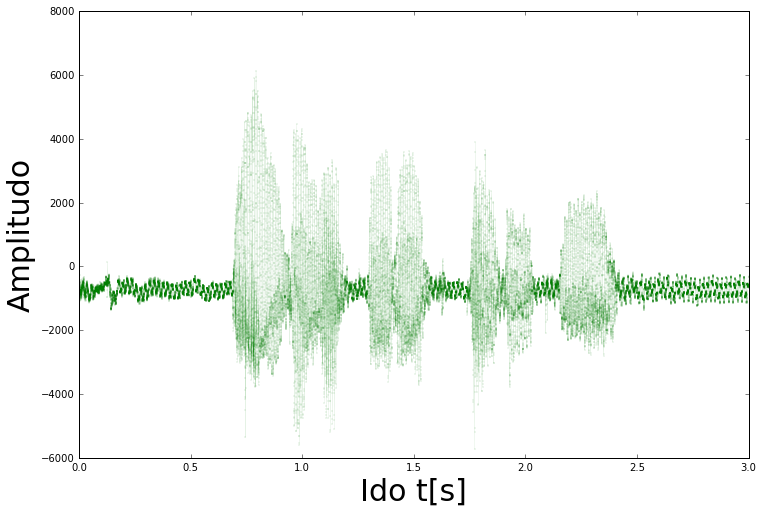

In [14]:
sps                     # mintavételi frekvencia
n = len(data)           # mintaszám
t = n / sps             # teljes minta időtartama

figsize(12,8)           # az ábra méretének beállítása

tt = linspace(0, t, n); # az időtengely megszerkesztése

plot(tt, data, 'g.-', label='minta', ms=.3, lw = .05)

#tengely cím feliratok
xlabel('Ido t[s]',fontsize=30) 
ylabel('Amplitudo',fontsize=30)


In [15]:
from IPython.display import Audio, display
display(Audio(data=data, rate=sps))

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo('EikXNts7EBs', width=800, height=600,loop=1)

In [ ]:
?YouTubeVideo